<a href="https://colab.research.google.com/github/RepoAnalysis/RepoSim/blob/main/notebooks/BiEncoder/Embeddings_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retrieve repositories from the awesome-python list along with their respective information such as topics, function list, docstring list, and embeddings generated by various models.

In [1]:
!pip install gdown
%cd /content/
!gdown 1BSJRIBi3hXnEtPqVJbD9vB9j2-KBf_1G

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content
Downloading...
From: https://drive.google.com/uc?id=1BSJRIBi3hXnEtPqVJbD9vB9j2-KBf_1G
To: /content/repo_info.pkl
100% 327M/327M [00:04<00:00, 69.4MB/s]


In [2]:
import pickle

repo_info_path = "/content/repo_info.pkl"

with open(repo_info_path, "rb") as f:
    repo_info = pickle.load(f)

next(iter(repo_info.values())).keys()

dict_keys(['docs', 'funcs', 'topic', 'allenai-specter', 'gsarti/scibert-nli', 'pritamdeka/S-Scibert-snli-multinli-stsb', 'paraphrase-multilingual-mpnet-base-v2', 'unixcoder-code-search-funcs', 'unixcoder-code-search-docs', 'unixcoder-clone-detection-docs', 'unixcoder-clone-detection-funcs', 'all-mpnet-base-v2', 'all-distilroberta-v1'])

### Evaluations & Results

In [3]:
import pandas as pd
from tqdm import tqdm
from itertools import combinations
from torch.nn import CosineSimilarity

cossim = CosineSimilarity(dim=0, eps=1e-8)
models=[
    "all-mpnet-base-v2",
    "all-distilroberta-v1",
    "paraphrase-multilingual-mpnet-base-v2", 
    "allenai-specter", 
    "gsarti/scibert-nli", 
    "pritamdeka/S-Scibert-snli-multinli-stsb", 
    "unixcoder-code-search-funcs",
    "unixcoder-code-search-docs",
    "unixcoder-clone-detection-docs",
    "unixcoder-clone-detection-funcs",
]

def compare_embeddings(model_name, repo1, repo2):
    e1, e2 = repo1[model_name], repo2[model_name]
    if e1 is None or e2 is None:
        return None
    return cossim(e1, e2).cpu().detach().numpy().item()

res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos*(num_of_repos-1) // 2
for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]

    for model_name in models:
        sim = compare_embeddings(model_name, repo_info[repo1], repo_info[repo2])
        row.append(sim)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + models)
df

100%|██████████| 106953/106953 [00:37<00:00, 2856.31it/s]


,repo1,repo2,topic1,topic2,all-mpnet-base-v2,all-distilroberta-v1,paraphrase-multilingual-mpnet-base-v2,allenai-specter,gsarti/scibert-nli,pritamdeka/S-Scibert-snli-multinli-stsb,unixcoder-code-search-funcs,unixcoder-code-search-docs,unixcoder-clone-detection-docs,unixcoder-clone-detection-funcs
0,boto/boto3,gorakhargosh/watchdog,Third-party APIs,Files,0.506485,0.527854,0.734368,0.974212,0.931573,0.781370,0.406343,0.101407,0.808835,0.793002
1,boto/boto3,unoconv/unoconv,Third-party APIs,Office,NaN,NaN,NaN,NaN,NaN,NaN,-0.036779,NaN,NaN,0.246730
2,boto/boto3,zoofIO/flexx,Third-party APIs,GUI Development,0.515931,0.581671,0.716118,0.958938,0.926257,0.822463,0.428869,0.183302,0.809811,0.879089
3,boto/boto3,paramiko/paramiko,Third-party APIs,Cryptography,0.533576,0.550703,0.698850,0.965750,0.913942,0.798274,0.511706,0.152281,0.784028,0.791197
4,boto/boto3,antocuni/pdb,Third-party APIs,pdb-like Debugger,0.338225,0.342305,0.668798,0.938059,0.808214,0.653922,0.283511,-0.152871,0.714224,0.770286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106948,mindsdb/mindsdb,knipknap/SpiffWorkflow,Machine Learning,Job Scheduler,0.520194,0.496464,0.754650,0.965191,0.937653,0.811222,0.314852,0.089271,0.817350,0.841479
106949,mindsdb/mindsdb,idan/oauthlib,Machine Learning,OAuth,0.434845,0.425579,0.705664,0.934916,0.916041,0.722093,0.393898,0.140914,0.621554,0.707856
106950,jonathanslenders/python-prompt-toolkit,knipknap/SpiffWorkflow,Interactive Interpreter,Job Scheduler,0.590523,0.636064,0.818017,0.968692,0.965174,0.864851,0.141457,0.057188,0.791110,0.783216
106951,jonathanslenders/python-prompt-toolkit,idan/oauthlib,Interactive Interpreter,OAuth,0.306767,0.393483,0.628449,0.904291,0.906426,0.754977,0.187620,0.000502,0.607360,0.642971


In [4]:
df.dropna(inplace=True, subset=models)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,all-mpnet-base-v2,all-distilroberta-v1,paraphrase-multilingual-mpnet-base-v2,allenai-specter,gsarti/scibert-nli,pritamdeka/S-Scibert-snli-multinli-stsb,unixcoder-code-search-funcs,unixcoder-code-search-docs,unixcoder-clone-detection-docs,unixcoder-clone-detection-funcs
0,boto/boto3,gorakhargosh/watchdog,Third-party APIs,Files,0.506485,0.527854,0.734368,0.974212,0.931573,0.781370,0.406343,0.101407,0.808835,0.793002
1,boto/boto3,zoofIO/flexx,Third-party APIs,GUI Development,0.515931,0.581671,0.716118,0.958938,0.926257,0.822463,0.428869,0.183302,0.809811,0.879089
2,boto/boto3,paramiko/paramiko,Third-party APIs,Cryptography,0.533576,0.550703,0.698850,0.965750,0.913942,0.798274,0.511706,0.152281,0.784028,0.791197
3,boto/boto3,antocuni/pdb,Third-party APIs,pdb-like Debugger,0.338225,0.342305,0.668798,0.938059,0.808214,0.653922,0.283511,-0.152871,0.714224,0.770286
4,boto/boto3,martinrusev/imbox,Third-party APIs,Mail Clients,0.316341,0.284072,0.480991,0.918199,0.807451,0.589278,0.230504,-0.089125,0.611759,0.818881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96575,mindsdb/mindsdb,knipknap/SpiffWorkflow,Machine Learning,Job Scheduler,0.520194,0.496464,0.754650,0.965191,0.937653,0.811222,0.314852,0.089271,0.817350,0.841479
96576,mindsdb/mindsdb,idan/oauthlib,Machine Learning,OAuth,0.434845,0.425579,0.705664,0.934916,0.916041,0.722093,0.393898,0.140914,0.621554,0.707856
96577,jonathanslenders/python-prompt-toolkit,knipknap/SpiffWorkflow,Interactive Interpreter,Job Scheduler,0.590523,0.636064,0.818017,0.968692,0.965174,0.864851,0.141457,0.057188,0.791110,0.783216
96578,jonathanslenders/python-prompt-toolkit,idan/oauthlib,Interactive Interpreter,OAuth,0.306767,0.393483,0.628449,0.904291,0.906426,0.754977,0.187620,0.000502,0.607360,0.642971


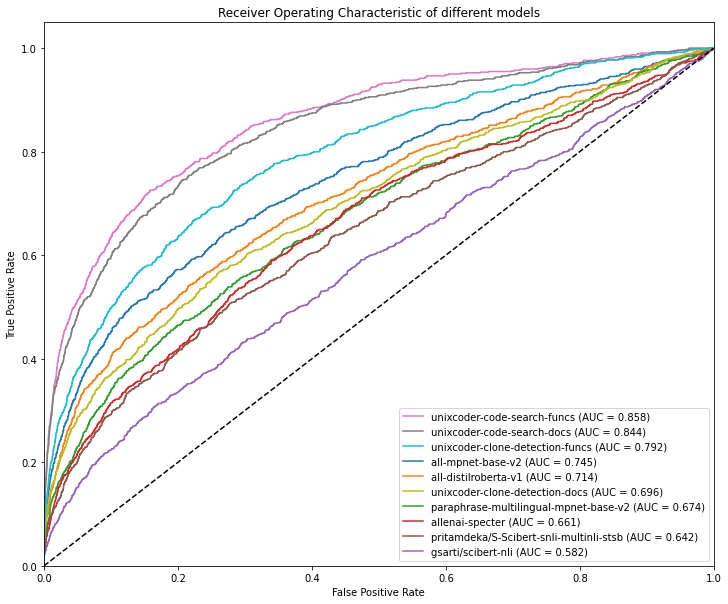

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))

def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)

for model in models:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc.eps')
plt.show()

In [6]:
model_auc

{'all-mpnet-base-v2': 0.7450338211956152,
 'all-distilroberta-v1': 0.7142198511107745,
 'paraphrase-multilingual-mpnet-base-v2': 0.674131866168184,
 'allenai-specter': 0.6614100437514556,
 'gsarti/scibert-nli': 0.5816840487868175,
 'pritamdeka/S-Scibert-snli-multinli-stsb': 0.6416874668284327,
 'unixcoder-code-search-funcs': 0.8583646702573949,
 'unixcoder-code-search-docs': 0.8435627237713328,
 'unixcoder-clone-detection-docs': 0.6958969084488333,
 'unixcoder-clone-detection-funcs': 0.791707157043762}

## Visualization of code embeddings generated by UniXCoder fine-tuned on code search

In [7]:
%pip install adjustText
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
model_name = "unixcoder-code-search-funcs"

names = []
topics = []
embeddings = []
for repo_name, repo_dict in repo_info.items():
    if repo_dict.get(model_name) is None:
        continue
    names.append(repo_name)
    topics.append(repo_dict["topic"])
    embeddings.append(repo_dict[model_name].unsqueeze(0).numpy())

embeddings = np.concatenate(embeddings, axis=0)

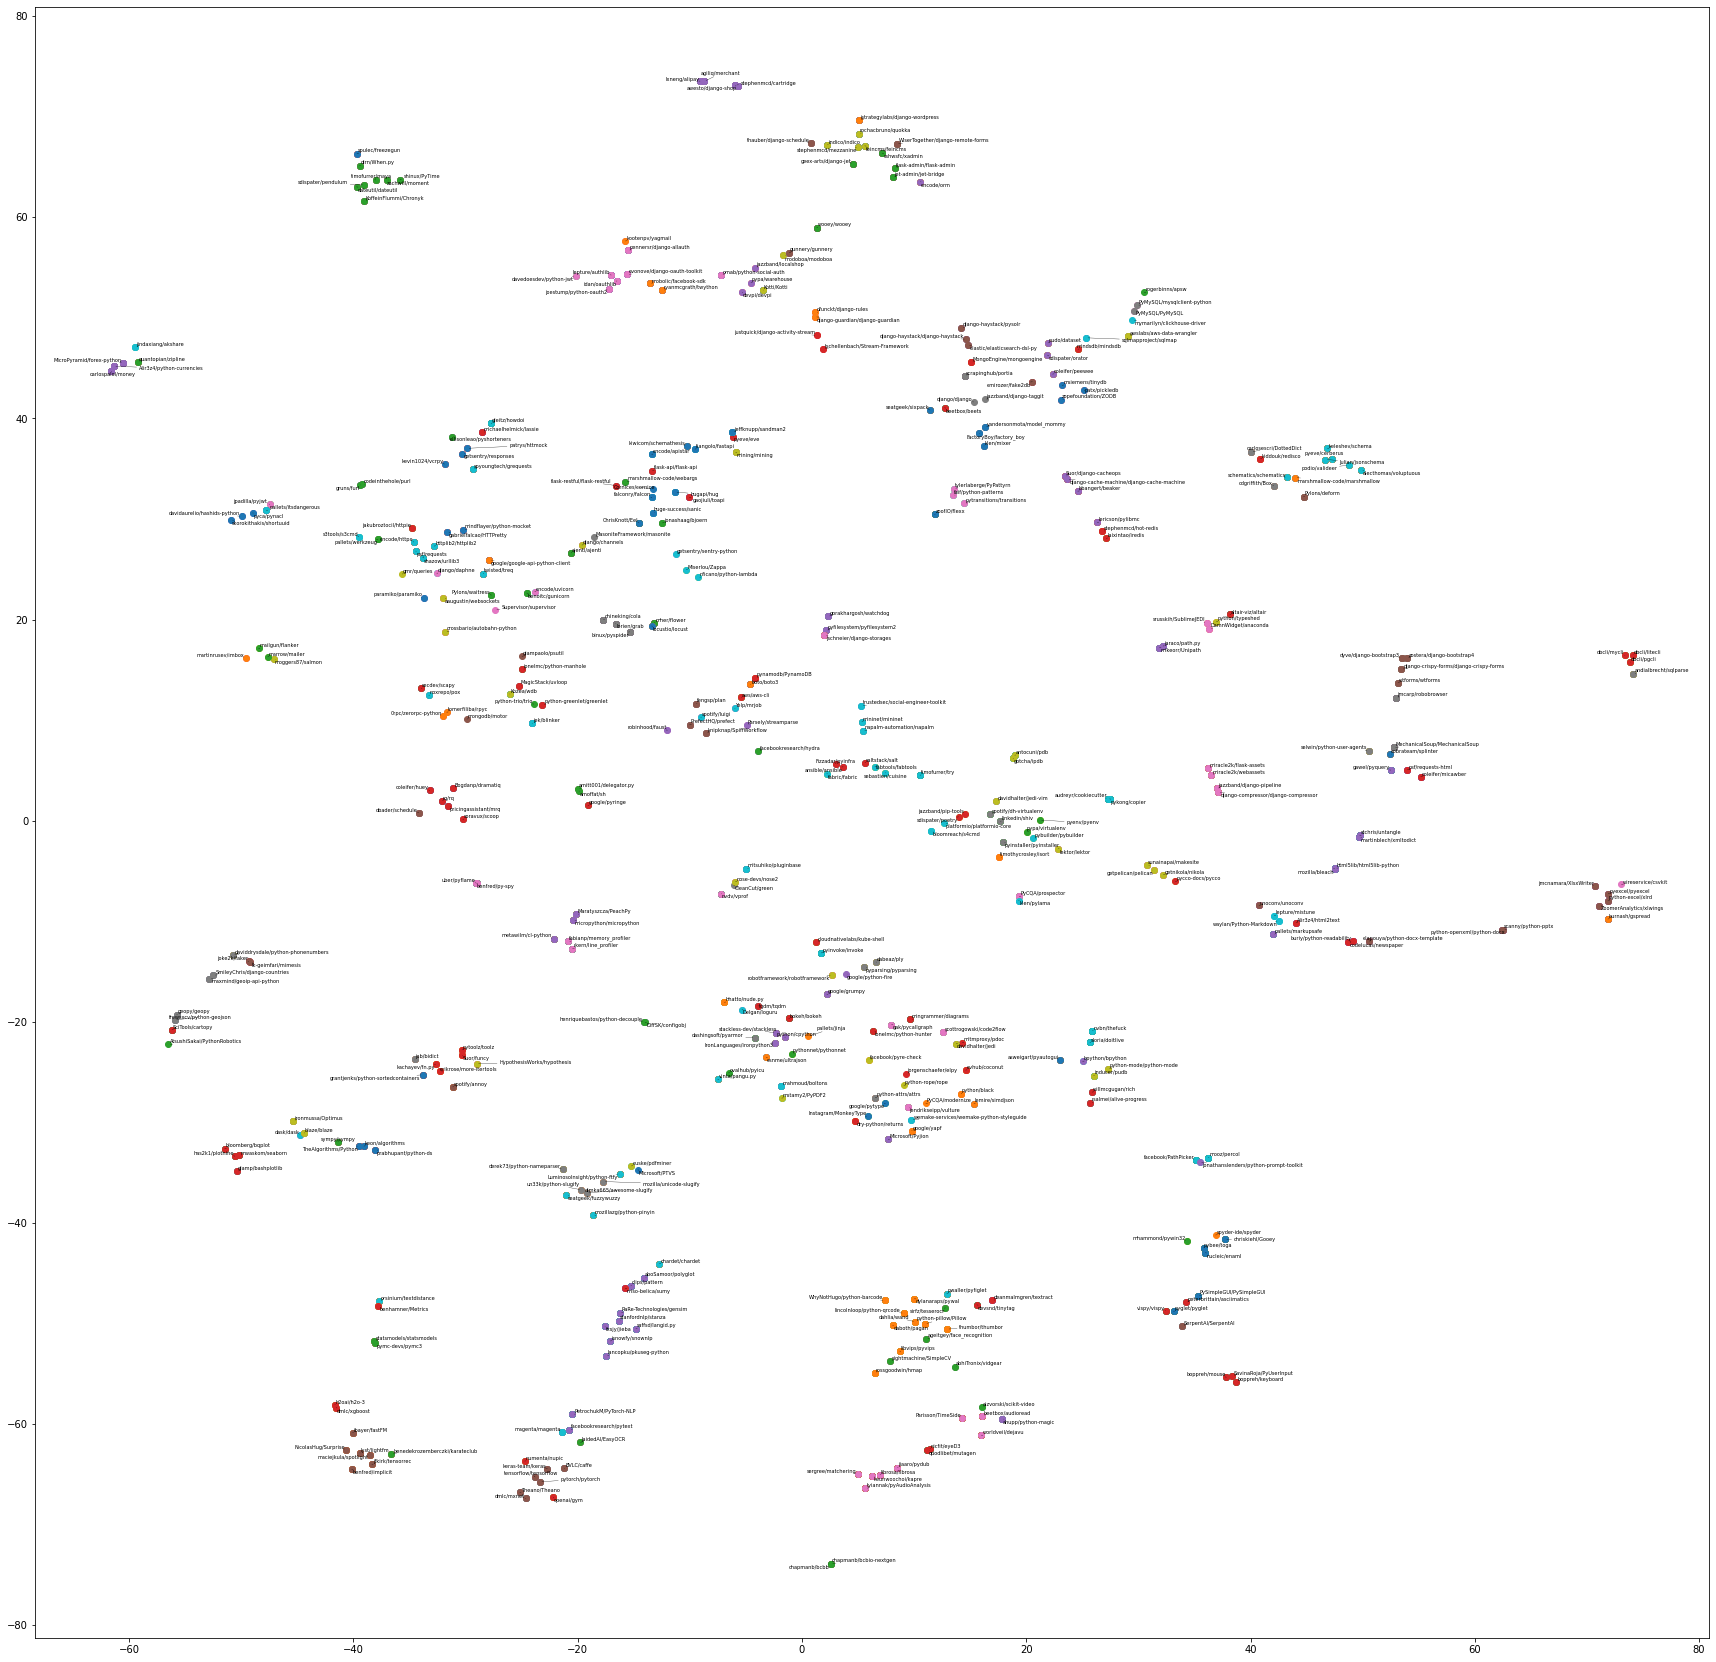

In [9]:
from sklearn.manifold import TSNE

group = np.array(topics)
texts = []

# 3D plot:
# tsne_3d = TSNE(n_components=3, metric='cosine').fit_transform(embeddings)
# x = tsne_3d[:, 0]
# y = tsne_3d[:, 1]
# z = tsne_3d[:, 2]

# fig = plt.figure(figsize=(30, 30))
# ax = fig.add_subplot(111, projection='3d')

# 2D plot:
tsne_2d = TSNE(n_components=2, metric='cosine', perplexity=3, random_state=42).fit_transform(embeddings)
x = tsne_2d[:, 0]
y = tsne_2d[:, 1]

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111)

for g in group:
    i = np.where(group == g)
    # ax.scatter(x[i], y[i], z[i], label=g) # 3D
    ax.scatter(x[i], y[i], label=g) # 2D

for i in range(x.size):
    texts.append(ax.text(x[i], y[i], names[i], fontsize=5, ha='center')) # 2D
    # texts.append(ax.text(x[i], y[i], z[i], names[i], fontsize=5, ha='center')) # 3D

# To adjust annotation overlap, it usually takes around 4-5 minutes 
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.3)) # Only works in 2D

plt.savefig('tsne.eps')
plt.show()